datasplit

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
df = pd.read_csv("/content/archive (1).zip", header=None)
df.columns = ["Category", "Description"]
custom_stopwords = set(["the", "is", "in", "and", "to", "a", "of", "for", "on", "with", "this",
                        "that", "it", "as", "at", "by", "an", "be", "from", "or", "not", "but"])
def simple_stemmer(word):
    return re.sub(r'(ing|ed|s)$', '', word)
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in custom_stopwords]
    tokens = [simple_stemmer(word) for word in tokens]
    return " ".join(tokens)
df["Processed_Description"] = df["Description"].apply(preprocess_text)
X_train, X_test, y_train, y_test = train_test_split(df["Processed_Description"], df["Category"], test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print("\nSample Processed Descriptions:")
print(X_train.head())


Training set size: 40340
Testing set size: 10085

Sample Processed Descriptions:
32700    icw girl scarf multicolour small x inch chiffo...
47130    ulanzi dh l bracket handle grip mic stand hot ...
20274    penguin essential my family other animal revie...
45776    gizga essential professional len pen clean pro...
7091     house quirk plastic storage organiser beige co...
Name: Processed_Description, dtype: object


 text cleaning and processing

In [ ]:
import re
custom_stopwords = set(["the", "is", "in", "and", "to", "a", "of", "for", "on", "with", "this",
                        "that", "it", "as", "at", "by", "an", "be", "from", "or", "not", "but"])

def simple_stemmer(word):
    return re.sub(r'(ing|ed|s)$', '', word)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()  # Tokenization (split by spaces)
    tokens = [word for word in tokens if word not in custom_stopwords]  # Remove stopwords
    tokens = [simple_stemmer(word) for word in tokens]  # Apply basic stemming
    return " ".join(tokens)

# Example usage
sample_text = "The quick brown fox jumps over the lazy dog, running swiftly!"
cleaned_text = clean_text(sample_text)

# Output result
print("Original Text: ", sample_text)
print("Cleaned Text: ", cleaned_text)


Original Text:  The quick brown fox jumps over the lazy dog, running swiftly!
Cleaned Text:  quick brown fox jump over lazy dog runn swiftly


data spiliting


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset (replace 'your_dataset.csv' with your actual file name)
df = pd.read_csv("/content/archive (1).zip", header=None)  # Try with and without header=None

# Print dataset columns to check actual column names
print("Dataset Columns:", df.columns)

# Print first few rows to inspect the data
print("\nSample Data:")
print(df.head())

# Manually assign correct column names (Adjust if needed)
df.columns = ["Category", "Text"]  # Update these names based on your dataset

# Define features (X) and target labels (y)
X = df["Text"]  # Change to the actual column name for text
y = df["Category"]  # Change to the actual column name for labels

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset split sizes
print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Display sample training data
print("\nSample Processed Training Data:")
print(X_train.head())


Dataset Columns: Index([0, 1], dtype='int64')

Sample Data:
           0                                                  1
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...

Training set size: 40340
Testing set size: 10085

Sample Processed Training Data:
32700    ICW Girls' Scarf (Multi-Coloured Small) 22 x 7...
47130    ULANZI DH-03 L Bracket Handle Griped Mic Stand...
20274    Penguin Essentials My Family and Other Animals...
45776    Gizga Essentials Professional Lens Pen Cleanin...
7091     House of Quirk Plastic Storage Organiser, Beig...
Name: Text, dtype: object


XGBoost Classifier

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/archive (1).zip")

# Print column names
print("Column Names in Dataset:", df.columns.tolist())

# Show first few rows to inspect the data
print(df.head())


Column Names in Dataset: ['Household', 'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are

WORD2VEC

In [ ]:
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
import nltk
nltk.download('punkt')  # Correct package name


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
pip install transformers torch datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.


pretrained XLnet

In [ ]:
import torch
from transformers import XLNetTokenizer, XLNetModel

# Load tokenizer and model
tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")
model = XLNetModel.from_pretrained("xlnet-base-cased")

# Example sentence
sentence = "XLNet is a powerful transformer model."

# Tokenize input
inputs = tokenizer(sentence, return_tensors="pt")

# Get XLNet embeddings
with torch.no_grad():
    outputs = model(**inputs)

# Extract hidden state
xlnet_embeddings = outputs.last_hidden_state
print("\n🔹 XLNet Embeddings Shape:", xlnet_embeddings.shape)  # [batch, seq_len, hidden_dim]


spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]


🔹 XLNet Embeddings Shape: torch.Size([1, 12, 768])


XLNet for Text Clustering

In [ ]:
import numpy as np
import torch
from transformers import XLNetTokenizer, XLNetModel
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df = pd.read_csv("/content/archive (1).zip")
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = XLNetModel.from_pretrained('xlnet-base-cased')
def get_xlnet_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
embeddings = np.array([get_xlnet_embedding(sentence) for sentence in sentences])
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(reduced_embeddings)
for i, sentence in enumerate(sentences):
    print(f"Sentence: '{sentence}' -> Cluster {clusters[i]}")


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Sentence: 'The cat sits on the mat.' -> Cluster 2
Sentence: 'Dogs are loyal animals.' -> Cluster 0
Sentence: 'I love programming in Python.' -> Cluster 4
Sentence: 'The weather is sunny today.' -> Cluster 1
Sentence: 'Artificial Intelligence is the future.' -> Cluster 3


clustering

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')  # Sometimes needed


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root

True

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
nltk.download("punkt")
df = pd.read_csv("/content/archive (1).zip")
product_desc_col = max(df.columns, key=len)
print(f"✅ Automatically selected column: '{product_desc_col}' as Product Description.")
df = df.rename(columns={product_desc_col: "Product_Description"})
df["Product_Description"] = df["Product_Description"].fillna("")
def safe_tokenize(text):
    try:
        return " ".join(word_tokenize(text.lower()))
    except Exception as e:
        print(f" Tokenization error: {e}. Using simple split() instead.")
        return " ".join(text.lower().split())
df["Tokenized_Description"] = df["Product_Description"].apply(safe_tokenize)
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["Tokenized_Description"])
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)
for cluster_num in range(num_clusters):
    print(f"\n🔹 Cluster {cluster_num}:")
    print(df[df["Cluster"] == cluster_num]["Product_Description"].head(5))
df.to_csv("clustered_output.csv", index=False)
print("\n Clustering complete! Results saved to 'clustered_output.csv'.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✅ Automatically selected column: 'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for p

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78a38aa65300>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e


🔹 Cluster 0:
44     Artworks: Meaning, Definition, Value Review "A...
106    Doodle Stitching Transfer Pack: 300+ Embroider...
109    Doodle Stitching Transfer Pack: 300+ Embroider...
121    The Overlocker Technique Manual: The Complete ...
746    The Fairytale Hairdresser and Rapunzel: Playbo...
Name: Product_Description, dtype: object

🔹 Cluster 1:
0    SAF 'Floral' Framed Painting (Wood, 30 inch x ...
1    SAF 'UV Textured Modern Art Print Framed' Pain...
2    SAF Flower Print Framed Painting (Synthetic, 1...
3    Incredible Gifts India Wooden Happy Birthday U...
4    Pitaara Box Romantic Venice Canvas Painting 6m...
Name: Product_Description, dtype: object

🔹 Cluster 2:
1701    BBC 066BB Gaming Cabinet With One 33 LED Fan ,...
1716    BBC 066BB Gaming Cabinet With One 33 LED Fan ,...
2003    BBC 066BB Gaming Cabinet With One 33 LED Fan ,...
2011    BBC 066BB Gaming Cabinet With One 33 LED Fan ,...
2403    Mi LED TV 4 PRO 138.88 cm (55) Ultra HD Androi...
Name: Product_Description,

bert with clustering

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
nltk.download("punkt")
df = pd.read_csv("/content/archive (1).zip")

product_desc_col = max(df.columns, key=len)
print(f"Automatically selected column: '{product_desc_col}' as Product Description.")

df = df.rename(columns={product_desc_col: "Product_Description"})

df["Product_Description"] = df["Product_Description"].fillna("")

def safe_tokenize(text):
    try:
        return " ".join(word_tokenize(text.lower()))
    except Exception as e:
        print(f"Tokenization error: {e}. Using simple split() instead.")
        return " ".join(text.lower().split())

df["Tokenized_Description"] = df["Product_Description"].apply(safe_tokenize)

bert_model = SentenceTransformer("all-MiniLM-L6-v2")  # Fas

embeddings = bert_model.encode(df["Tokenized_Description"], show_progress_bar=True)

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(embeddings)
for cluster_num in range(num_clusters):
    print(f"\n🔹 Cluster {cluster_num}:")
    print(df[df["Cluster"] == cluster_num]["Product_Description"].head(5))
df.to_csv("bert_clustered_output.csv", index=False)
print("\n BERT-based clustering complete! Results saved to 'bert_clustered_output.csv'.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Automatically selected column: 'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for ple

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1576 [00:00<?, ?it/s]


🔹 Cluster 0:
107    Voberry Magic Embroidery Pen Punch Needle, Mag...
115    Voberry Magic Embroidery Pen Punch Needle, Mag...
121    The Overlocker Technique Manual: The Complete ...
122    2Pcs Steel Overlocker Blade Upper and Lower fo...
123    Usha Janome Dream Stitch Automatic Zig-Zag Ele...
Name: Product_Description, dtype: object

🔹 Cluster 1:
44     Artworks: Meaning, Definition, Value Review "A...
106    Doodle Stitching Transfer Pack: 300+ Embroider...
109    Doodle Stitching Transfer Pack: 300+ Embroider...
622    Trust Basket Carnation Mixed Flowers Seeds (Gr...
746    The Fairytale Hairdresser and Rapunzel: Playbo...
Name: Product_Description, dtype: object

🔹 Cluster 2:
27    Streetkart Women's & Girl's Traditional Kutchi...
45    Streetkart Women's & Girl's Traditional Kutchi...
63    Streetkart Women's & Girl's Traditional Kutchi...
97    Sewn Golden Colour Seed Beads For Embroidery/S...
98    iCraft RN281 Cotton Embroidery Thread Set (Mul...
Name: Product_Description,

ELBO model

In [ ]:
pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
pip install numpy pandas nltk scikit-learn matplotlib



Elbow Method Loss Values (WCSS):
Clusters: 1, Loss (WCSS): 7.6300
Clusters: 2, Loss (WCSS): 6.3123
Clusters: 3, Loss (WCSS): 5.2379
Clusters: 4, Loss (WCSS): 4.1891
Clusters: 5, Loss (WCSS): 3.2101
Clusters: 6, Loss (WCSS): 2.3130
Clusters: 7, Loss (WCSS): 1.4470
Clusters: 8, Loss (WCSS): 0.6964
Clusters: 9, Loss (WCSS): 0.0000


<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

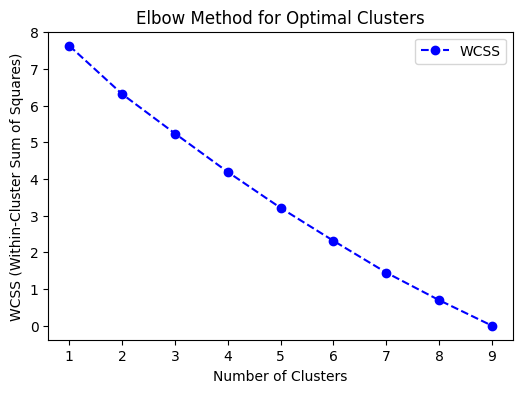

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
df = pd.read_csv("/content/archive (1).zip")

# Convert text into numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Elbow method for finding optimal clusters
wcss = []  # Within-Cluster Sum of Squares
clusters_range = range(1, 10)

print("\nElbow Method Loss Values (WCSS):")
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    loss_value = kmeans.inertia_
    wcss.append(loss_value)
    print(f"Clusters: {k}, Loss (WCSS): {loss_value:.4f}")
plt.figure(figsize=(6, 4))
plt.plot(clusters_range, wcss, marker='o', linestyle='--', color='b', label="WCSS")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal Clusters")
plt.xticks(clusters_range)
plt.legend()
plt.grid


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define the Variational Autoencoder (VAE)
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2_mean = nn.Linear(hidden_dim, latent_dim)  # Mean of latent space
        self.fc2_logvar = nn.Linear(hidden_dim, latent_dim)  # Log variance
        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, input_dim)

    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2_mean(h), self.fc2_logvar(h)

    def reparameterize(self, mean, logvar):
        std = torch.exp(0.5 * logvar)  # Convert log variance to std
        epsilon = torch.randn_like(std)  # Random noise
        return mean + epsilon * std  # Sample z

    def decode(self, z):
        h = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h))  # Output in range [0,1]

    def forward(self, x):
        mean, logvar = self.encode(x)
        z = self.reparameterize(mean, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mean, logvar
def elbo_loss(recon_x, x, mean, logvar):
    recon_loss = F.binary_cross_entropy(recon_x, x, reduction='sum')
    kl_div = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp())
    return recon_loss + kl_div
input_dim = 784
hidden_dim = 400
latent_dim = 20
vae = VAE(input_dim, hidden_dim, latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)
x = torch.rand((64, input_dim))
recon_x, mean, logvar = vae(x)
loss = elbo_loss(recon_x, x, mean, logvar)
optimizer.zero_grad()
loss.backward()
optimizer.step()

print(f"ELBO Loss: {loss.item()}")


ELBO Loss: 35131.390625
